In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import json
from itertools import count

In [7]:
node_attribute = pd.read_csv("node_attributes_hashed.csv", encoding = "ISO-8859-1")
node_attribute = node_attribute[["position_type", "company_type", "hashedid"]]

In [8]:
node_attribute.head()

,position_type,company_type,hashedid
0,engineer,tech,058b92d6c47c4f8e29b302b30a1fff4a21ba9d36
1,executive_or_management,finance,e943ba6d3c0eb8589df32a873ab5772c8f77c68f
2,marketing_sales,Unknown,07722a6692fb28485ddaf84979322fb5a78d0926
3,marketing_sales,Unknown,eb319e0714095bc9f9517317e9040f125b8de8d4
4,misc,misc,acddbb2edb475d3a5fd127075dc146eb9ba94e0e


In [15]:
node_attribute["hashedid"].nunique()

1947

In [16]:
node_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947 entries, 0 to 1946
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   position_type  1947 non-null   object
 1   company_type   1947 non-null   object
 2   hashedid       1947 non-null   object
dtypes: object(3)
memory usage: 45.8+ KB


In [17]:
node_attribute["position_type"].nunique()

9

In [19]:
node_attribute["company_type"].nunique()

11

In [21]:
node_attribute = node_attribute.set_index("hashedid")
node_attribute.tail()

,position_type,company_type
hashedid,,
d2d878318aaa8825d9e0e43b162ae0b33a9a90ca,misc,misc
3e0a9701ee6796753d601a8d9ba551fec1e9b8d3,executive_or_management,nonprofit_ngo
dbfb54497fe275982736b278a69ac0d6554469d0,education,education
ef0a4531dbc7fd4b16765ea67bbbac66c496f392,misc,tech
4e32a64bff2dc06f797ff6492ec5844bf18bbfb9,engineer,tech


In [23]:
attribute_dict = node_attribute.to_dict(orient="index")

In [24]:
attribute_dict

{'058b92d6c47c4f8e29b302b30a1fff4a21ba9d36': {'position_type': 'engineer',
  'company_type': 'tech'},
 'e943ba6d3c0eb8589df32a873ab5772c8f77c68f': {'position_type': 'executive_or_management',
  'company_type': 'finance'},
 '07722a6692fb28485ddaf84979322fb5a78d0926': {'position_type': 'marketing_sales',
  'company_type': 'Unknown'},
 'eb319e0714095bc9f9517317e9040f125b8de8d4': {'position_type': 'marketing_sales',
  'company_type': 'Unknown'},
 'acddbb2edb475d3a5fd127075dc146eb9ba94e0e': {'position_type': 'misc',
  'company_type': 'misc'},
 'bd4783a20926f4486e97351c3cc30b764c532482': {'position_type': 'misc',
  'company_type': 'misc'},
 'dc01dcef18ba7b6eb477d0cb2950ac40469ec3f9': {'position_type': 'marketing_sales',
  'company_type': 'supplychain_manufacturing'},
 'cb2508a49cae4dd2b0c2d7895ed90342690afebe': {'position_type': 'executive_or_management',
  'company_type': 'finance'},
 'd4aea40e1a87586350a1bafa25f20aab746bab69': {'position_type': 'engineer',
  'company_type': 'tech'},
 '540e

In [26]:
candidate_link_file= open("relationships_hashed.json") 

In [37]:
with open("relationships_hashed.json") as candidate_link_file:
    adjacency_candidate_ref = json.load(candidate_link_file)



In [41]:
len(set(adjacency_candidate_ref.keys()))

1855

In [46]:
def create_adjacency_list(data_dict, suffix=''):
    """
    This function is meant to illustrate the transformation of raw data into
    an adjacency list. It was created for the social graph use case
    args:
        data_dict - dictionary of candidate referrals where they keys are members who have referred other candidate
        the values are the list of the people who are referred.
        suffix - to append to the file name
    return:
        data_dict - adjacency list in a txt file
        list_of_nodes - A list of node id found    
    """
    # A to B because this is an undirected graph, there must be a symmertry in the values
    # Every value in a key must contain that key in its own entry.
    # So, for entry F, if G is a value, then for entry G, F must be a value.
    # These lines check for that and fix the dictionary if these conditions don't exist.
    list_of_nodes = []
    for source_node in list(data_dict.keys()):
        list_of_nodes.append(source_node)
        
        for y in data_dict[source_node]:
            if source_node not in list_of_nodes:
                list_of_nodes.append(y)
            if y not in data_dict.keys():
                data_dict[y] = [source_node]
            else:
                if source_node not in data_dict[y]:
                    data_dict[y].append(source_node)
                else:
                    continue
            
    # create a text file that will store the adjacency list
    g = open("adjacency_list_{}.txt".format(suffix), "w+")
    # for every key in the dictionary
    # D1 create a string from the list of dictionary values
    # This value is a string of member ids separated by empty spaces
    # 
    # D2 optional print
    # D3 write a line to the text file. this line will contain the member hash, then a string of relationship hashes
    for source_node in list(data_dict.keys()):
        dt = " ".join((data_dict[source_node]))
        #print("{} {}".format(source_node, dt))
        g.write("{} {} \n".format(source_node, dt))
    g.close()
    print(len(list_of_nodes))
    return list_of_nodes, data_dict
    

In [63]:
list_of_nodes_adj, candidate_dict = create_adjacency_list(adjacency_candidate_ref, "candidates")

1933


In [64]:
graph_from_adj = nx.read_adjlist("adjacency_list_candidates.txt")
graph_from_adj.number_of_edges(), graph_from_adj.number_of_nodes()

(12239, 1933)

In [65]:
def create_edge_list(data_dict, suffix=" "):
    """
    This function is meant to illustrate the transformation of raw
    data into an edge list. It was created for the social graph use case.
    
    Args:
        data_dict - a dictionary of candidate referrals where the keys are members who have referred other candidate,
                    and the values are list of the people who are referred.
        suffix- to append to the file name
    
    return:
        list_of_edges - an edge adjacency list of txt file
        list_of_nodes_all - list of the node id found and generate edges
    """
    
    edge_list_file = open("edge_list_{}.txt".format(suffix), "w+")
    list_of_edges = []
    list_of_nodes_all = []
    for source_node in list(data_dict.keys()):
        if source_node not in list_of_nodes_all:
            list_of_nodes_all.append(source_node)
        list_of_connects = data_dict[source_node]
        
        # Each member dictionary value is a list of relationships.
        # For every key, we iterate through every value
        for destination_node in list_of_connects:
            if destination_node not in list_of_nodes_all:
                list_of_nodes_all.append(destination_node)
            
            # because this graph is undirected, we don't want to create duplicate edges
            # For example, since {F,G} is the same as {G,F}, we only need one of these
            # This line checks if a node pair exists already. We use a set object since the node order doesn't matter
            if {source_node, destination_node} not in list_of_edges:
                print("{} {}".format(source_node, destination_node))
                # we write the line to the  text file. this line will consist of the node pair
                edge_list_file.write("{} {} \n".format(source_node,destination_node))
                list_of_edges.append({source_node, destination_node})
            else:
                continue
    return list_of_edges, list_of_nodes_all

In [ ]:
list_of_edges, list_of_nodes_all = create_edge_list(adjacency_candidate_ref, "candidates")

In [72]:
len(list_of_edges), len(list_of_nodes), len(list_of_nodes_adj)

(12239, 1933, 1933)

In [77]:
social_graph = nx.read_adjlist('adjacency_list_candidates.txt')
nx.set_node_attributes(social_graph, attribute_dict)
print(social_graph.number_of_nodes(), social_graph.number_of_edges())

1933 12239


In [78]:
len(list((c for c in nx.connected_components(social_graph))))

219

In [79]:
sorted_components = sorted(list(len(c) for c in nx.connected_components(social_graph)), reverse=True)
set(sorted_components)

{1, 2, 3, 4, 1698}

In [83]:
groups = set(nx.get_node_attributes(social_graph, "position_type").values())
mapping = dict(zip(sorted(groups), count()))
values = [mapping[attribute_dict[node]['position_type']] if node in attribute_dict.keys() else .25 for node in social_graph.nodes()]

In [84]:
mapping

{'Unknown': 0,
 'education': 1,
 'engineer': 2,
 'executive_or_management': 3,
 'finance': 4,
 'legal': 5,
 'marketing_sales': 6,
 'misc': 7,
 'operations_supplychain': 8}

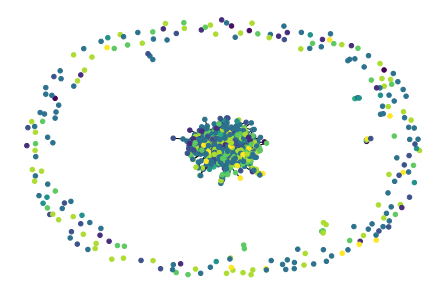

In [87]:
nx.draw(social_graph, cmap=plt.get_cmap('viridis'), node_color=values, node_size=20, with_labels=False, font_color="white")
plt.show()

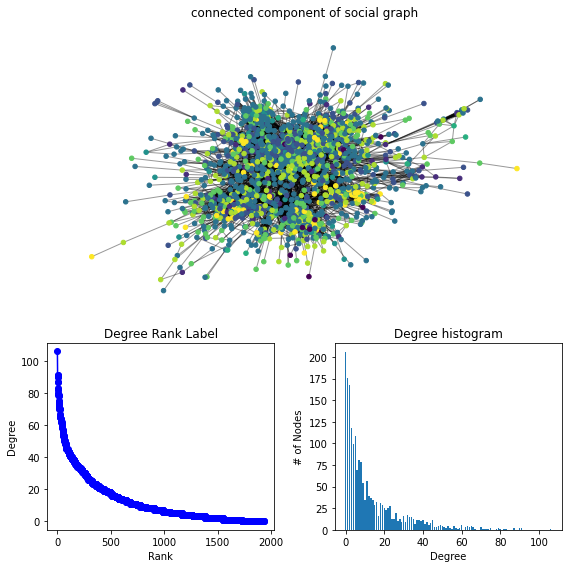

In [91]:

#  modified from networkx documentation
fig = plt.figure("Degree of a random graph", figsize=(8,8))

# create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5,4)


ax0 = fig.add_subplot(axgrid[0:3, :])

# Gcc stands for graph connected component
# create a distinct graph object from the largest connected component of a given graph
Gcc = social_graph.subgraph(sorted(nx.connected_components(social_graph), key=len, reverse=True)[0])

groups2 = set(nx.get_node_attributes(Gcc, 'position_type').values())

nx.get_node_attributes(Gcc, 'position_type')

mapping2 = dict(zip(sorted(groups2),count()))
values2 = [mapping2[attribute_dict[node]['position_type']] for node in Gcc.nodes()] 

pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20, node_color=values2)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)

ax0.set_title("connected component of social graph")
ax0.set_axis_off()

degree_sequence = sorted([d for n, d in social_graph.degree()], reverse=True)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Label")
ax1.set_xlabel("Rank")
ax1.set_ylabel("Degree")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [73]:
Gcc.number_of_edges(), Gcc.number_of_nodes()

NameError: name 'Gcc' is not defined

In [ ]:
# visualize an adjacency matrix of our graph
plt.imshow(nx.to_numpy_matrix(social_graph), aspect='equal', cmap='hot')

In [71]:
graph_from_edge_list = nx.read_edgelist('edge_list_candidates.txt')
graph_from_edge_list.number_of_edges(), graph_from_edge_list.number_of_nodes()

(12239, 1727)

In [ ]:
import torch
from teorch_geometric.data import Data, InMemeoryDataset
from torch_geometric import utils

In [ ]:
# Case A: Create PyG data object using Networkx object
data = utils.from_networkx(social_graph)

In [ ]:
# Case B: Create PyG data object using raw file

# A load edgelist text file into a networkx graph object
social_graph = nx.read_adjlist("adjacency_list_candidates.txt")

# B 
# create a list of nodes from networkx graph
list_of_nodes = list(set(list(social_graph)))
# C
# create a list of indices of nodes
indices_of_nodes = [list_of_nodes.index(x) for x in list_of_nodes]

# D
# create dictionary convert a node name to its index and vice versa
node_to_index = dict(zip(list_of_nodes, indices_of_nodes))
index_to_node = dict(zip(indices_of_nodes, list_of_nodes))

# E create networkx edgelist object
list_edges = nx.convert.to_edgelist(social_graph)
list_edges = list(list_edges)

# F
# take edge list object and create two list: one source nodes for the edge and 
# a list of respective destination nodes
named_edge_list_0 = [x[0] for x in list_edges]
named_edge_list_1 = [x[1] for x in list_edges]

# G
# creating indexed version of the source and destination nodes list from F
indexed_edge_list_0 = [node_to_index[x] for x in named_edge_list_0]
indexed_edge_list_1 = [node_to_index[x] for x in named_edge_list_1]

# H
# x feature/attribute set for nodes, as a pytorch tensor object, given all nodes the same single feature: 1
x = torch.FloatTensor([[1] for x in range(len(list_of_nodes))]) #[[] for x in range(n)]
#I
# y is set of labels, as pytorch tensor object, two labels in dataset: 0 and 1
y = torch.FloatTensor([1]*974 + [0]*973)
y = y.long()

# J
# transform into pytorch geometric tensor
edge_index = torch.tensor([indexed_edge_list_0, indexed_edge_list_1]) # J

# K
# create mechansim to set train, test, validation sets for the dataset object
train_mask = torch.zeros(len(list_of_nodes), dtype=torch.uint8)
train_mask[:int(0.8*len(list_of_nodes))] = 1 # train only on the 80% nodes

test_mask = torch.zeros(len(list_of_nodes), dtype=torch.uint8) 
test_mask[-int(0.2*len(list_of_nodes)):] = 1 # test on 20% nodes

train_mask = train_mask.bool()
test_mask = test_mask.bool()

# L
# combine our transformations of the previous lines into data object
data = Data(x=x, y=y, edge_index=edge_index, train_mask = train_mask, test_mask=test_mask) #L

In [ ]:
# Create PyG data object using custom class and input files

class MyOwnDataset(InMemoryDataset):    
    def __init__(self, root, transform=None, pre_transform=None):
        # initialize datset class inherit from InMemoryDataset class.
        # create data and slices object to updated in the process method
        super(MyOwnDataset, self).__init__(root, transform, pre_transform)
        self.data, self.slices = torch.load(self.processed_path)
    
    @property
    def raw_file_names(self):
        
        return []
    @property
    def processed_file_names(self):
        # save generated dataset to disk
        return ["../test.dataset"]
    
    def download(self):
        pass
    
    def process(self):
        """
        process method contain the preprocessing steps to create data object
        then makes additional steps to partition our data for loading
        """
        
        data_list = []
        
        eg = nx.read_edgelist('edge_list2.txt')
        
        node_to_index = dict(zip(list_of_nodes, indices_fo_nodes))
        index_to_node = dict(zip(indices_of_nodes, list_of_nodes))
        
        list_edges = nx.convert.to_edgelist(eg)
        list_edges = list(list_edges)
        
        named_edge_list_0 = [x[0] for x in list_edges]
        named_edge_list_1 = [x[1] for x in list_edges]
        
        indexed_edge_list_0 = [node_to_index[x] for x in named_edge_list_0]
        indexed_edge_list_1 = [node_to_index[x] for x in named_edge_list_1]
        
        x = torch.FloatTensor([[1] for x in range(len(list_of_nodes))])
        
        y = torch.FloatTensor([1]*974 + [0]*973)
        y = y.long()
        
        edge_index = torch.tensor([indexed_edge_list_0, indexed_edge_list_1])
        
        # train on 80% of nodes
        train_mask = torch.zeros(len(list_of_nodes), dtype=torch.uint8)
        train_mask[:int(0.8*len(list_of_nodes))] = 1
        
        #test on 20% nodes
        test_mask = torch.zeros(len(list_of_nodes), dtype=torch.uint8)
        test_mask[-int(0.2*len(list_of_nodes)):]
        
        train_mask = test_mask.bool()
        test_mask = test_mask.bool()
        
        # training the data, pulling from a list object would be slow, so we take iterable and use collate to combine the data into one data object
        # F
        # create example data and then append to a list
        data_example = Data(x=x, y=y, edge_index=edge_index, train_mask=train_mask, test_mask=test_mask)
        
        data_list.append(data_example) #G
        
        # collate method combine the data examples into one data object
        # collate method create a dict named slices that is used to pull single samples from this data object
        data, slices = self.collate(data_list) # H
        # save our pre-processed data to disk
        torch.save((data, slices), self.processed_paths[0])  #I

In [ ]:
# Case D: Create PyG data obj for use in DataLoader without use of a dataset obj
from torch_geometric.data import Data, DataLoader

# data_list = [Data(...), Data(...)]
# We'll use the data object from case B

data_list = [data]
loader = DataLoader(data_list, batch_size=32)